# P2 Investigate a dataset  
## Dataset investigated - Titanic Passengers Dataset  
### Description of the dataset:  

Titanic dataset from [kaggle.com](https://www.kaggle.com/c/titanic/data). This dataset has datapoints of the titanic disaster ready for some analytics.  
In the dataset we will try to discover some interesting points and see what we can find.  

** VARIABLE DESCRIPTIONS:  **  

| DATAPOINT     | MEANING        
| ------------- |:-------------  
| survival      | survival Survival (0 = No; 1 = Yes) 
| pclass        | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
| name          | Name  
| sex           | Sex  
| age           | Age  
| sibsp         | Number of Siblings/Spouses Aboard  
| parch         | Number of Parents/Children Aboard  
| ticket        | Ticket Number  
| fare          | Passenger Fare  
| cabin         | Cabin  
| embarked      | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

SPECIAL NOTES:  
Pclass is a proxy for socio-economic status (SES) -- 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower  
Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5  
  
With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.  
  
Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic  
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)  
Parent:   Mother or Father of Passenger Aboard Titanic  
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic  
  
Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Questions to answer  
1) Did the passengers gender make a difference on if they survived or not?  
2) Does where the people boarded give them a better chance of survival?  
3) Did the passengers class in society give them a better chance of survival?

#### Import statements to view the dataset, read the dataset into a Pandas dataframe and graph inline 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

titanic_data = pd.read_csv("titanic_data.csv")

Populating the interactive namespace from numpy and matplotlib


#### Clear NaN or missing info from dataset

In [2]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Already I can see just by the head that there are a lot of datapoints removed. We'll need to make sure we capture the total passenger count for future calculations.

In [3]:
# This should equal 891 for this dataset.
total_passenger_count = len(titanic_data) 

In [4]:
# The rows that have incomplete data. This should equal 708
incomplete_data_count = total_passenger_count - len(titanic_data.dropna()) 

# The complete data count. This should equal 183
complete_data_count = total_passenger_count - incomplete_data_count

# Percent of missing data
missing_data_percent = 100 - len(titanic_data.dropna()) * 1.0 / len(titanic_data) * 100 # 79.46127946127946 percent
print "{} = {}".format("Percentage of missing data", missing_data_percent)

Percentage of missing data = 79.4612794613


Hrm, the dataset has a lot of NaN entries in it, Let's loot at the columns that have the most and determine if we need these columns or not.

The column cabin has 687 blank cells. This looks like a good candidate for cleansing.  
Let's replace the NaN values in the Cabin column.  
While it might be better to leave the data as is, we should clean this to assure that we can do some calculations if needed. Let's replace them with the word 'unknown'.  

The column Age has 177 blanks but this would throw off some future metrics so let's leave this as is.

In [5]:
titanic_data['Cabin'].fillna('unknown', inplace=True)

In [6]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


#### General statistics from dataset   

What do we see? Using the describe we can get some information on the dataset as it is. Let's see what we have.  

In [7]:
# Show some basic statistics of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that there are 891 passengers.  
The average age is just over 29 years old.  
The average fare was around $32.20.  
The oldest passenger was 80 years old while the youngest was about 5 months (almost half a year old).  

If we wanted to find data on a particular column, we could do the same thing but specify a column. Let's look at the Sex column to see what we have.  

In [8]:
# Show some basic statistics of a column. In this case the 'Sex' column.
titanic_data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

We see that there are 891 items in the dataset. That was expected.  
The unique counts the total different variations that are found in this column. In this case 2 for male and female.  
We see that the top point in the dataset is 'male' and it's frequency is 577; about 0.647 or 65 percent.

#### Did the passengers gender make a difference on if they survived or not?

In [9]:
# Find the number of passengers male and female. 
male_passenger_count = titanic_data.Sex.value_counts()['male']
female_passenger_count = titanic_data.Sex.value_counts()['female']
print "{} = {}".format("Number of male passengers", male_passenger_count)
print "{} = {}".format("Number of female passengers", female_passenger_count)

# Find the percentages of males and females onboard
male_percentage = (male_passenger_count * 1.0)/ (total_passenger_count) * 100
female_percentage = (female_passenger_count * 1.0)/ (total_passenger_count) * 100
print "{} = {}".format("Percent of female passengers", female_percentage)
print "{} = {}".format("Percent of male passengers", male_percentage)

Number of male passengers = 577
Number of female passengers = 314
Percent of female passengers = 35.241301908
Percent of male passengers = 64.758698092


##### Graph the number of men and women aboard

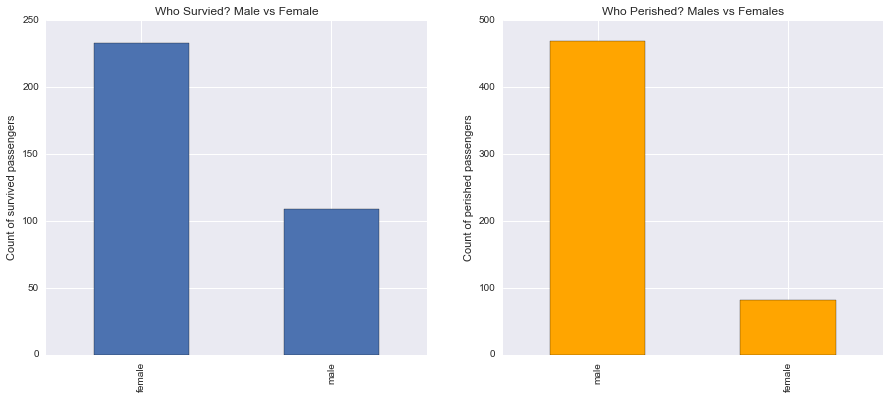

In [10]:
# Use plt.figure to plot two different grpahs side by side.
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
# Plot the male vs female survivors.
titanic_data.Sex[titanic_data.Survived == 1].value_counts().plot(kind='bar')
title("Who Survied? Male vs Female")
plt.ylabel("Count of survived passengers")

fig.add_subplot(122)
# Plot the male vs female victims.
titanic_data.Sex[titanic_data.Survived  == 0].value_counts().plot(kind='bar', color='orange')
title("Who Perished? Males vs Females")
plt.ylabel("Count of perished passengers")

For question 1, "Did the passengers gender make a difference on if they survived or not?" we can easily see that there was definately a women & children first ideology. While the male survivors were just over 100 the women doubled that and then some approaching 250. This doesn't seem that offsetting at first but let's also look at those that perished.  
Less than 100 females perished, close to 500 male lives were cut short.  
Let's see the actual numbers of survivors and victims.  

In [11]:
victims = titanic_data.Sex[titanic_data.Survived  == 0].value_counts()
survivors = titanic_data.Sex[titanic_data.Survived  == 1].value_counts()
print "Victims\n", victims
print 
print "Survivors\n", survivors

Victims
male      468
female     81
Name: Sex, dtype: int64

Survivors
female    233
male      109
Name: Sex, dtype: int64


** In short, males fared far worse than females in their survival rate. **  
We can clearly see that the rate of survival differed between men & women. More men were killed in this tragedy than women even when you take into account the ratio of men to women abord the ship.

### 2) Does where the people boarded give them a better chance of survival?  

The first thing to do is isolate pair survivors or victims based on their port call. This will allow us to see how many survived or died based on the port where they boarded the Titanic.

In [12]:
died = titanic_data.Embarked[titanic_data.Survived  == 0].value_counts()
survivors = titanic_data.Embarked[titanic_data.Survived  == 1].value_counts()
print "Died\n", died, "\n\n", "Survived\n", survivors

Died
S    427
C     75
Q     47
Name: Embarked, dtype: int64 

Survived
S    217
C     93
Q     30
Name: Embarked, dtype: int64


Personally, I like looking at charts along with a pivot table. To me it's like peanut butter & chocolate.  

<bound method DataFrame.pivot_table of Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217>

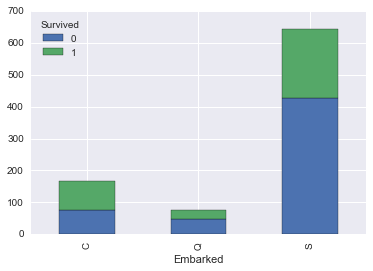

In [13]:
grouped_data = titanic_data.groupby(['Embarked', 'Survived'])['Survived'].count().unstack()
grouped_plot = grouped_data.plot(kind='bar', stacked=True)
grouped_data.pivot_table

With the following ports as destinationsof embarking, we can see that the survival rates are highest in Southampton.  
However Southampton has the most passengers in total. Southampton was the first port of call, Cherbourgh was the second while Queenstown was third.  [Titanic Route](https://www.google.com/maps/d/u/0/viewer?mid=1_wHu5MbgJEPHFScw7qdaMF3nkMg&hl=en_US)  

In [14]:
embarked_totals = titanic_data.Embarked.value_counts()
embarked_totals

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
print "Southampton survival percentage", 217.0/(217+427)
print "Cherbourgh survival percentage", 93.0/(75+93)
print "Queenstown survival percentage", 30.0/(30+47)

Southampton survival percentage 0.336956521739
Cherbourgh survival percentage 0.553571428571
Queenstown survival percentage 0.38961038961


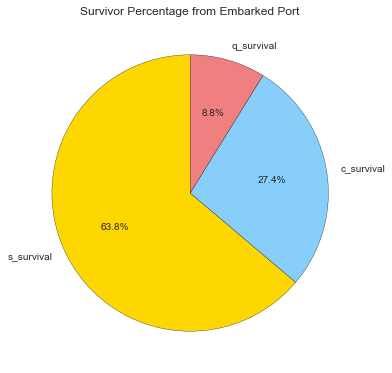

In [34]:
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
s_survival = (titanic_data.Survived[titanic_data.Embarked == 'S'][titanic_data.Survived == 1].value_counts()
             ) / survivors.sum()
c_survival = (titanic_data.Survived[titanic_data.Embarked == 'C'][titanic_data.Survived == 1].value_counts()
             ) / survivors.sum()
q_survival = (titanic_data.Survived[titanic_data.Embarked == 'Q'][titanic_data.Survived == 1].value_counts()
             ) / survivors.sum()

labels = ['s_survival', 'c_survival', 'q_survival']
sizes = [s_survival[1], c_survival[1], q_survival[1]]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
title('Survivor Percentage from Embarked Port')

### 3) Did the passengers class in society give them a better chance of survival?

In [ ]:
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]
temp = list(zip(fracs, labels))
pie(fracs, explode=None, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=90)
title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})

In [24]:
survivors.sum()

340